In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Частина друга: Аналіз файлів

##### Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [4]:
url = 'https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, index_col=0)

##### Прочитайте отриману таблицю, використовуючи метод head

In [5]:
data.head()

,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
N,,,,,,,,,,,,,,,,,,,,,
1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,Продуктовая,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


##### Визначте розмір таблиці за допомогою методу shape

In [6]:
data.shape

(8704, 24)

##### Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
data.dtypes

Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                                int64
Валюта                          

##### Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
data.isnull().sum()

Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls                                 1574
dtype: int64

##### Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [9]:
find_nulls = data.isnull().sum()
nulls = [x for x, y in find_nulls.items() if y !=0]
res = data.drop(nulls[1:], axis=1)

##### Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [10]:
res.isnull().sum()

Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

##### Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [11]:
data.dropna()
data

,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
N,,,,,,,,,,,,,,,,,,,,,
1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,Продуктовая,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV


In [12]:
droppna = data.dropna()

##### Визначте новий розмір таблиці за допомогою методу shape

In [13]:
droppna.shape

(0, 24)

##### Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [14]:
python_data = data[data['Язык.программирования'] == 'Python']
python_data

,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
N,,,,,,,,,,,,,,,,,,,,,
13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,Стартап,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV


##### Визначте розмір таблиці python_data за допомогою методу shape

In [15]:
python_data.shape

(207, 24)

##### Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [16]:
group = data.groupby('Должность').nunique()
print(group)

                                            Язык.программирования   
Должность                                                           
Business analyst                                                0  \
DBA                                                             0   
Data Scientist / Data Analyst                                   1   
Designer                                                        0   
DevOps                                                          1   
Director of Engineering / Program Director                      0   
ERP / CRM                                                       1   
Game designer                                                   0   
HR                                                              0   
HTML coder                                                      2   
Junior QA engineer                                              0   
Junior Software Engineer                                       19   
Marketing                         

##### Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [17]:
new = data.groupby('Должность')['Зарплата.в.месяц'].agg(['min', 'max'])
new

,min,max
Должность,,
Business analyst,200,5000
DBA,380,6000
Data Scientist / Data Analyst,150,8000
Designer,100,4000
DevOps,194,10000
Director of Engineering / Program Director,1500,34000
ERP / CRM,100,6000
Game designer,150,6800
HR,100,7000


##### Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу a та створіть новий стовпчик "avg"

In [18]:
def fill_avg_salary():
    temp = new.iloc[:, [0, 1]].mean(axis=1)
    return temp

temp = pd.concat([new, fill_avg_salary().rename('avg')], axis=1)
temp

,min,max,avg
Должность,,,
Business analyst,200,5000,2600.0
DBA,380,6000,3190.0
Data Scientist / Data Analyst,150,8000,4075.0
Designer,100,4000,2050.0
DevOps,194,10000,5097.0
Director of Engineering / Program Director,1500,34000,17750.0
ERP / CRM,100,6000,3050.0
Game designer,150,6800,3475.0
HR,100,7000,3550.0


##### Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [19]:
temp['avg'].describe()

count       32.000000
mean      3449.234375
std       3093.885174
min        900.000000
25%       1820.500000
50%       2837.500000
75%       3756.250000
max      17750.000000
Name: avg, dtype: float64

##### Збережіть отриману таблицю в CSV файл

In [20]:
temp.to_csv('temp_res.csv')

# Візуалізація

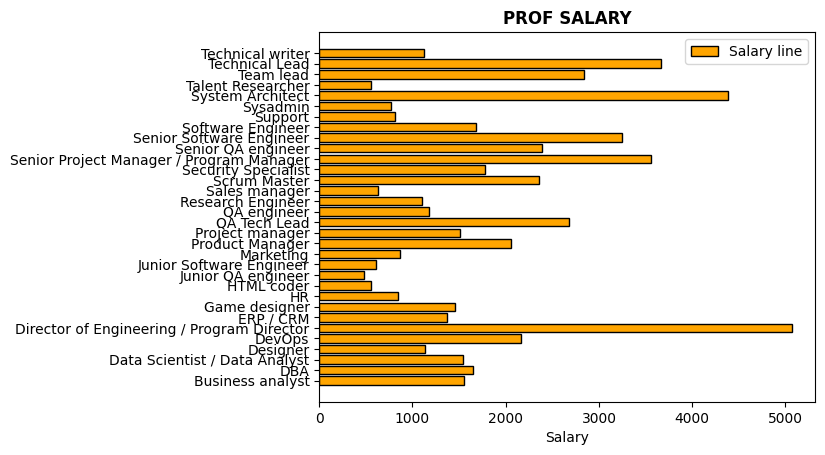

In [23]:
mean_salary = data.groupby('Должность')['Зарплата.в.месяц'].agg('mean')
mean_salary = mean_salary.astype(int)
plt.barh(y=mean_salary.index, width=mean_salary, color='orange', edgecolor='black', label='Salary line' )
plt.title('PROF SALARY', fontweight='heavy')
plt.xlabel('Salary', fontsize='medium')
plt.legend()
plt.show()

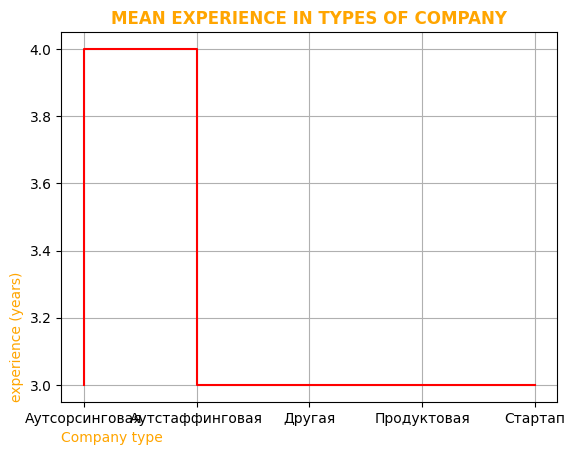

In [38]:
exp = data.groupby('Тип.компании')['exp'].agg(['mean']).astype('int')
plt.figure(edgecolor='green',  )
plt.step(x=exp.index, y=exp, color='r')
plt.title('MEAN EXPERIENCE IN TYPES OF COMPANY', fontweight='heavy', color='orange')
plt.xlabel('Company type', color='orange', loc='left')
plt.ylabel('experience (years)', color='orange', loc='bottom')
plt.grid()
plt.show()

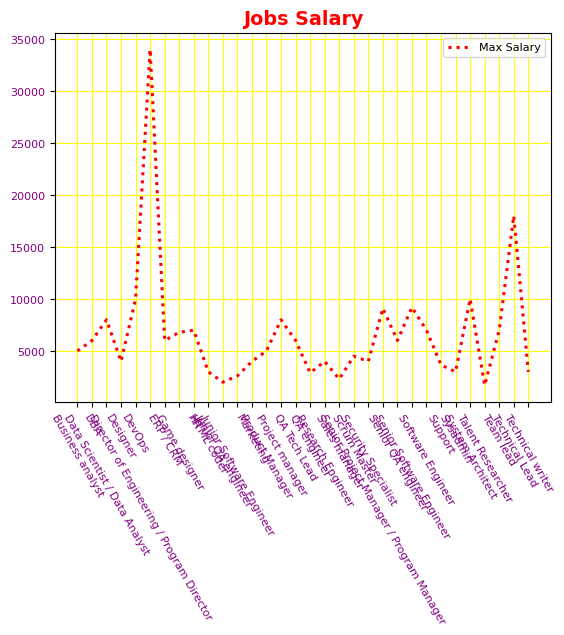

In [44]:
plt.rc('font', size=8)
plt.grid(color='yellow')
plt.xticks(rotation=300, color='purple')
plt.yticks(color='purple')
plt.plot(data.groupby('Должность')["Зарплата.в.месяц"].agg('max'), color='red', label='Max Salary', ls=':', linewidth=2.2)
plt.title('Jobs Salary', fontsize='xx-large', fontweight='heavy', color='red')
plt.legend()
plt.show()